In [1]:
import numpy as nump 
import math 
import pandas as pan #reading lines from csv file intp an array later 
import os 
import glob # getting the csv files which are stored in the same folder
import tkinter as tkin
from tkinter import filedialog
import matplotlib.pyplot as plt 

import ruptures as rpt
from scipy.signal import savgol_filter

In [2]:
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
my_csv_files = glob.glob(os.path.join(work, "*.csv")) # identifies the csv files in this directory
print(my_csv_files)

['C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\2022_06_03_0,20,60_MTcapped_wandwoTAX\\60MinTAx\\MT1\\Values_Plot of Acquired-139_568_alphatub_60Min_tax_corrected_inv_MT1 - Kopie.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\2022_06_03_0,20,60_MTcapped_wandwoTAX\\60MinTAx\\MT1\\Values_Plot of Acquired-139_568_alphatub_60Min_tax_corrected_inv_MT1.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\2022_06_03_0,20,60_MTcapped_wandwoTAX\\60MinTAx\\MT1\\Values_Plot of Acquired-_MT1_140_488_acetyltub_60min_tax_cor_inv - Kopie.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\2022_06_03_0,20,60_MTcapped_wandwoTAX\\60MinTAx\\MT1\\Values_Plot of Acquired-_MT1_140_488_acetyltub_60min_tax_cor_inv.csv']


C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\2022_06_03_0,20,60_MTcapped_wandwoTAX\60MinTAx\MT1\Values_Plot of Acquired-139_568_alphatub_60Min_tax_corrected_inv_MT1.csv
C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\2022_06_03_0,20,60_MTcapped_wandwoTAX\60MinTAx\MT1\Values_Plot of Acquired-_MT1_140_488_acetyltub_60min_tax_cor_inv.csv
     Distance_(pixels)  Gray_Value
0                    0     222.901
1                    1     216.018
2                    2     216.865
3                    3     210.343
4                    4     207.986
..                 ...         ...
563                563     204.244
564                564     207.409
565                565     215.772
566                566     202.509
567                567     204.112

[568 rows x 2 columns]
     Distance_(pixels)  Gray_Value
0                    0     272.887
1                    1     276.875
2                    2     283.380
3                    3     274.600
4          

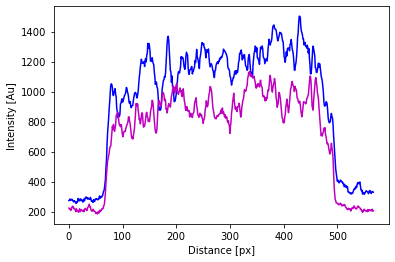

In [3]:
for l in range(len(my_csv_files)):
    if "Kopie" not in my_csv_files[l]:
        #later insert code for title search 
        if "Values_Plot" and "alphatub" in my_csv_files[l]:
            print(my_csv_files[l])
            Data_568=pan.read_csv(my_csv_files[l],sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
            plt.plot(Data_568.iloc[:,0],Data_568.iloc[:,1], c="b")# Data_568.iloc[:,0] is x-Data and Data_568.iloc[:,1] is y-data from panda frame 
            array_568=Data_568.to_numpy() # array_568 contains the alphatubulin Data from the Lineprofile over a single MT 
            #print(Data_568)
            #print(array_568)
            #print(Data_568.iloc[:,1])
        elif "Values_Plot" and "acetyl" in my_csv_files[l]:
            print(my_csv_files[l])
            Data_488=pan.read_csv(my_csv_files[l],sep=',', encoding = 'unicode_escape')
            plt.plot(Data_488.iloc[:,0],Data_488.iloc[:,1], c="m")  
            plt.xlabel("Distance [px]")
            plt.ylabel("Intensity [Au]")
            #plt.title("Intensity of Lineprofile of {} stabilized  Microtubule after {} min alphaTAT1 incubation".format(tax, time))
            array_488=Data_488.to_numpy()# array_488 contains the acetylated tubulin Data from the Lineprofile over a single MT 
    #print(my_csv_files[l],reading) #all the csv files in the directory with the same indetifier
print(Data_488)
print(Data_568)
#print(Data_568.columns)



In [4]:
#converting pixel in µm 0.045400065, 22.0264 pixel/µm
Data_568["Distance_µm"] = Data_568.iloc[:,0].multiply(0.0454)
Data_488["Distance_µm"] = Data_488.iloc[:,0].multiply(0.0454)
position= Data_568.columns.get_loc("Distance_µm")
position_488= Data_488.columns.get_loc("Distance_µm")#
array_488_um=Data_488.to_numpy()
array_568_um=Data_568.to_numpy()
#print(position)
print(position_488)
#Data_568.iloc[:,3] = Data_568.iloc[:,0].multiply(0.0454)
print(Data_568.iloc[:,position])
print(array_488_um)
print(Data_568)


2
0       0.0000
1       0.0454
2       0.0908
3       0.1362
4       0.1816
        ...   
563    25.5602
564    25.6056
565    25.6510
566    25.6964
567    25.7418
Name: Distance_µm, Length: 568, dtype: float64
[[0.00000e+00 2.22901e+02 0.00000e+00]
 [1.00000e+00 2.16018e+02 4.54000e-02]
 [2.00000e+00 2.16865e+02 9.08000e-02]
 ...
 [5.65000e+02 2.15772e+02 2.56510e+01]
 [5.66000e+02 2.02509e+02 2.56964e+01]
 [5.67000e+02 2.04112e+02 2.57418e+01]]
     Distance_(pixels)  Gray_Value  Distance_µm
0                    0     272.887       0.0000
1                    1     276.875       0.0454
2                    2     283.380       0.0908
3                    3     274.600       0.1362
4                    4     280.814       0.1816
..                 ...         ...          ...
563                563     320.331      25.5602
564                564     328.256      25.6056
565                565     334.059      25.6510
566                566     332.293      25.6964
567               

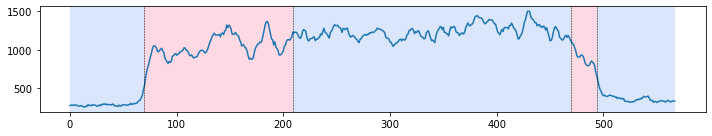

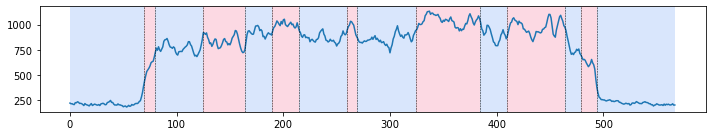

[70, 210, 470, 495, 568]
[544.187]
[445.96]


In [7]:
#detection of changepoint 
#alphatubulin Start and End Microtubule 
algo_new=rpt.Dynp(model="rbf").fit_predict(array_568,n_bkps=4) #works definetly better forn O Minutestax
#algo3=rpt.Dynp(model="rbf").fit_predict(array_568,n_bkps=2)

#Trying to detect patches in acetylation Intensity signal 
algo2=rpt.Pelt(model="rbf").fit_predict(array_488,1.1) # Increase penalty from 1.1 to achieve better fit for acetylated Data 
#  fit_predict(self, signal, pen) # Fit to the signal and return the optimal breakpoints. Helper method to call fit and predict once

# display
rpt.display(array_568[:,1],algo_new,algo_new, computed_chg_pts_linewidth=0.5)

rpt.display(array_488[:,1],algo2, algo2,computed_chg_pts_linewidth=0.5)
#just selects the intensity values for the display function of rupture

#costfunction with penalty 800 aber ohne determination of number of changepoints for acetylated signal patches 
#minimum distance between changepoints 
# ein parameter ändern und dann vergleichen 
plt.show()
print(algo_new)
print(array_568[70:71,1])
print(array_488[70:71,1])

In [6]:
l_border=algo_new[0]
up_border=algo_new[len(algo_new)-2]
leng_pix=up_border-algo_new[0]
print("lower_border_x:", l_border, "upper_border_x:", up_border, "length in pixel:",leng_pix) 

lower_border_x: 70 upper_border_x: 495 length in pixel: 425


In [8]:
#Splitting the array based on the defined borders(=Microtubule start and end) 
n_ar_488_um= array_488_um[l_border:up_border+1,]#slicing the array based on the borders 
end= len(n_ar_488_um[:,0])
leng_um=n_ar_488_um[end-1:end,2]-n_ar_488_um[0:1,2]
#print(n_ar_488_um[end-1:end,0])
l_border_um_48=n_ar_488_um[0:1,2]
up_border_um_48=n_ar_488_um[end-1:end,2]
print("lower_border_x:", l_border_um_48, "upper_border_x:", up_border_um_48, "length in µm:",leng_um )

n_ar_568_um= array_568_um[l_border:up_border+1,]#slicing the array based on the borders 
leng_um_568=n_ar_568_um[end-1:end,2]-n_ar_568_um[0:1,2]
l_border_um_568=n_ar_568_um[0:1,2]
up_border_um_568=n_ar_568_um[end-1:end,2]
print("lower_border_x:", l_border_um_568, "upper_border_x:", up_border_um_568, "length in µm:",leng_um_568 )

#print(n_ar_488_um[:,1])

lower_border_x: [3.178] upper_border_x: [22.473] length in µm: [19.295]
lower_border_x: [3.178] upper_border_x: [22.473] length in µm: [19.295]


In [9]:
#integral = nump.trapz(array_488[:,1], array_488[:,0])
#print(integral) 

integral_alpha = nump.trapz(n_ar_568_um[:,1], n_ar_568_um[:,0])
print(integral_alpha) 

integral_borders= nump.trapz(n_ar_488_um[:,1], n_ar_488_um[:,0])
print(integral_borders) 

#Summe_border=nump.sum(n_ar_488_um[:,1])
#print("Summe b:", Summe_border)
#print(n_ar_488_um[:,1])

Summe=nump.sum(array_488[:,1])
print("Summe 488:", Summe)

Summe_alpha=nump.sum(array_568[:,1])
print("Summe 568:", Summe_alpha)

490039.60250000004
376418.5335
Summe 488: 408190.50899999996
Summe 568: 536766.846


In [10]:
# creating values for diagramm 
array_time= [0,5,10,20,60]
value_length_48= leng_um
value_time_48=10 #time 
value_int_48=integral_borders

y48_value= integral_borders/leng_um
print(y48_value)
x48_value= 10 #time 
print("y488:",y48_value[0], "x488:", x48_value)
string48_y= str(y48_value[0])
string48_x=str(x48_value)+","
print(string48_y, string48_x)

y568_value= integral_alpha/leng_um_568
x568_value= 10 #time 
print("y568:",y568_value[0], "x568:", x568_value)
string568_y= str(y568_value[0])
string568_x=str(x568_value)+","
print(string568_y, string568_x)

#sum acetyl/sum alpha 

y_sumAC_sumAL= y48_value/y568_value
string_sumdiv_y= str(y_sumAC_sumAL[0])
print(string_sumdiv_y)

[19508.6050013]
y488: 19508.605001295673 x488: 10
19508.605001295673 10,
y568: 25397.232573205492 x568: 10
25397.232573205492 10,
0.7681390066836487


In [11]:
# saving values sum acetyl/sum alpha normalized over length MT  in a file to open later again and do statistical analysis
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
f = open('SUMAcetyl_DIV_SUMAlpha_for_timepoints_without_taxol', 'a')

#f = open('AUC_lengthMT_for_timepoints', 'w')

f.write(string48_x)
f.write(string_sumdiv_y+"\n")

#good pracitice
f.close()

   Time(min)   AUC acetyl/AUC alpha tub 
0          0                    0.118463
1          5                    0.188682
2         10                    0.316106
3         20                    0.515420
4         60                    0.701663


Text(0.5, 1.0, 'Taxol treated Microtubules: Area under the curve of the Intensity acetylated tubulin/alpha tubulin normalized by Microtubule length')

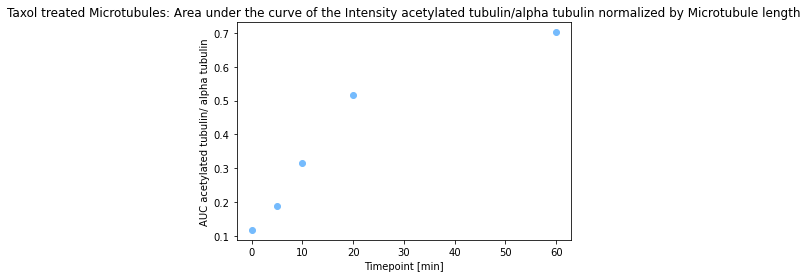

In [13]:


SUM_acetDIValpha=pan.read_csv('C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\SUMAcetyl_DIV_SUMAlpha_for_timepoints_taxol.csv',sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
print(SUM_acetDIValpha)
plt.plot(SUM_acetDIValpha.iloc[:,0],SUM_acetDIValpha.iloc[:,1], c='xkcd:sky blue', marker="o", ls='None')  
plt.xlabel("Timepoint [min]")
plt.ylabel("AUC acetylated tubulin/ alpha tubulin")
plt.title("Taxol treated Microtubules: Area under the curve of the Intensity acetylated tubulin/alpha tubulin normalized by Microtubule length")

           